In [1]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
df =pd.read_csv('data/wine.data', header = None)
df.shape

(178, 14)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
features = df.iloc[:, 1:13]
features.head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93


In [5]:
target = df.iloc[:,0]
target.head()

0    1
1    1
2    1
3    1
4    1
Name: 0, dtype: int64

In [6]:
X = features
y = target
print(X.shape, y.shape)

(178, 12) (178,)


In [7]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

In [8]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(features.values)
features['pca-one'] = pca_result[:,0]
features['pca-two'] = pca_result[:,1] 
features['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [0.90943684 0.05129807 0.02496957]


In [9]:
features.head()

,1,2,3,4,5,6,7,8,9,10,11,12,pca-one,pca-two,pca-three
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,27.380959,-3.581757,-0.176223
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,0.425439,-8.370370,-0.077081
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1.335565,-1.067523,0.401783
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,13.458190,-2.638000,2.267268
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,18.205010,1.709183,-1.509592


<AxesSubplot:xlabel='pca-one', ylabel='pca-two'>

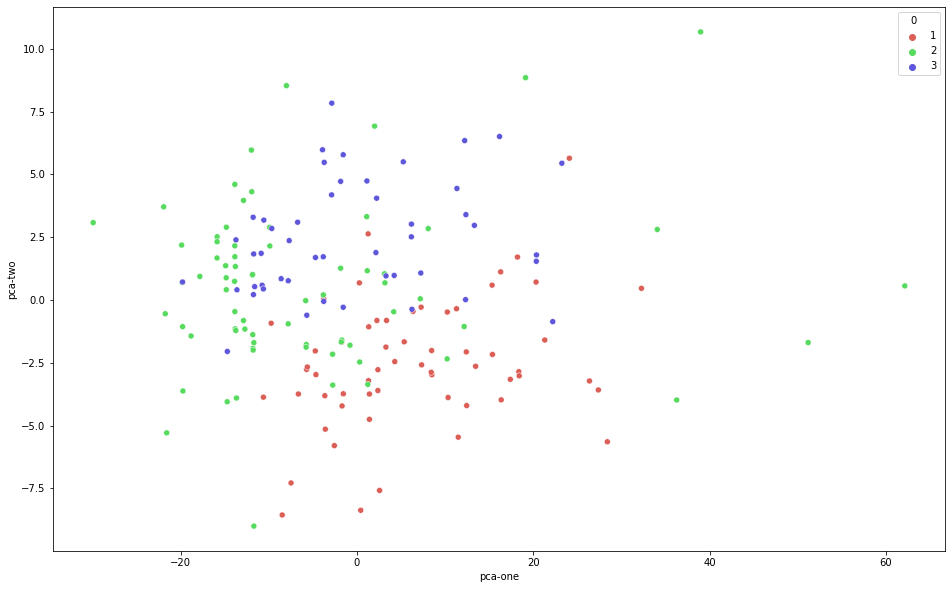

In [10]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue=y,
    palette=sns.color_palette("hls", 3),
    data=features)

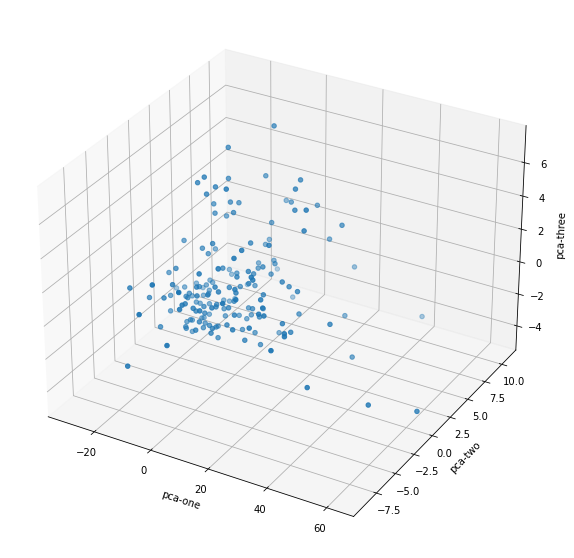

In [11]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=features["pca-one"], 
    ys=features["pca-two"], 
    zs=features["pca-three"], 
#     c=df.loc[rndperm,:]["y"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

In [12]:
data_subset = features.values
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)
features['pca-one'] = pca_result[:,0]
features['pca-two'] = pca_result[:,1] 
features['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.91598407 0.05166738 0.02514933]


In [13]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=19, n_iter=500)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 58 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.002s...
[t-SNE] Computed neighbors for 178 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 4.354880
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.810120
[t-SNE] KL divergence after 500 iterations: 0.277261
t-SNE done! Time elapsed: 0.9640007019042969 seconds


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

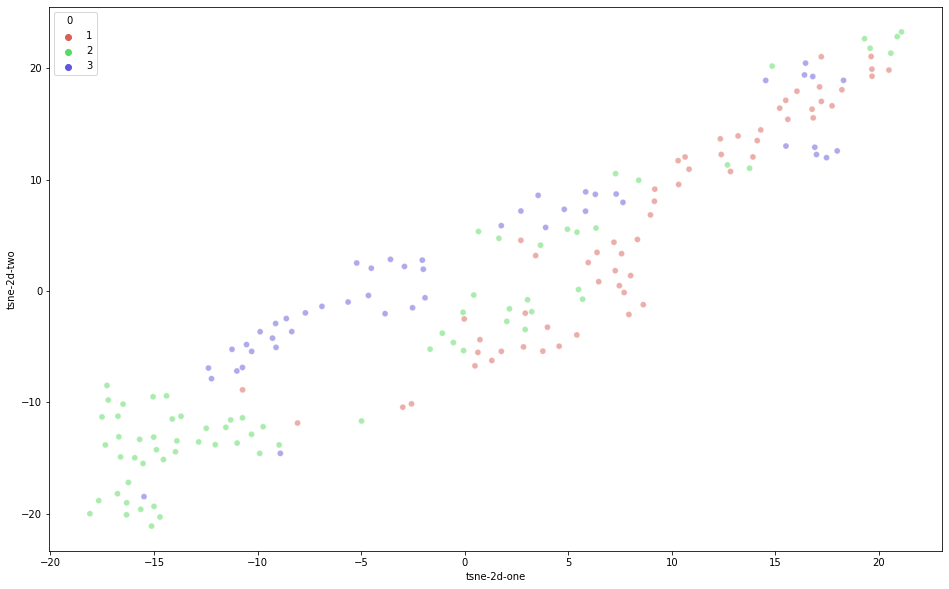

In [14]:
features['tsne-2d-one'] = tsne_results[:,0]
features['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=y,
    palette=sns.color_palette("hls", 3),
    data=features,
    legend="full",
    alpha=0.5
)

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

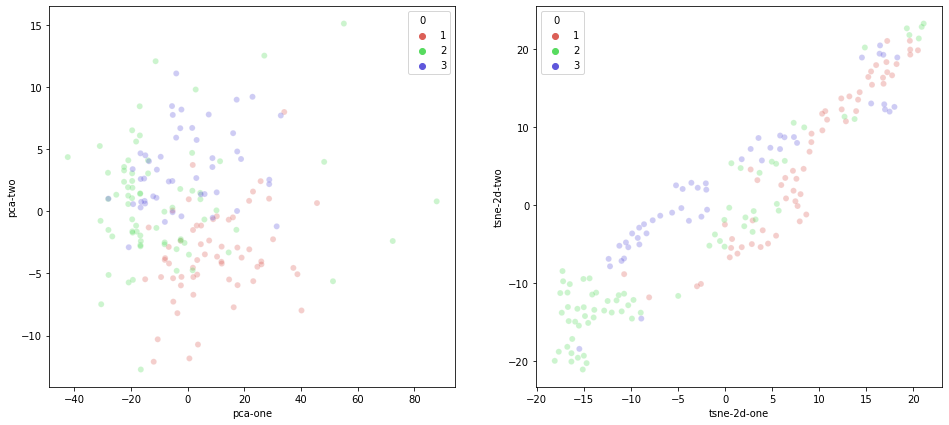

In [15]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue=y,
    palette=sns.color_palette("hls", 3),
    data=features,
#     legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=y,
    palette=sns.color_palette("hls", 3),
    data=features,
#     legend="full",
    alpha=0.3,
    ax=ax2
)

### Need to make embeddings for target names on the clustera

In [16]:
with open("data/wine.names") as t:
    print(t.read())

1. Title of Database: Wine recognition data
	Updated Sept 21, 1998 by C.Blake : Added attribute information

2. Sources:
   (a) Forina, M. et al, PARVUS - An Extendible Package for Data
       Exploration, Classification and Correlation. Institute of Pharmaceutical
       and Food Analysis and Technologies, Via Brigata Salerno, 
       16147 Genoa, Italy.

   (b) Stefan Aeberhard, email: stefan@coral.cs.jcu.edu.au
   (c) July 1991
3. Past Usage:

   (1)
   S. Aeberhard, D. Coomans and O. de Vel,
   Comparison of Classifiers in High Dimensional Settings,
   Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of
   Mathematics and Statistics, James Cook University of North Queensland.
   (Also submitted to Technometrics).

   The data was used with many others for comparing various 
   classifiers. The classes are separable, though only RDA 
   has achieved 100% correct classification.
   (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed data))
   (All results usi